<a href="https://colab.research.google.com/github/CorkCork/NYPD-Motor-Vehicle-Collisions/blob/master/Copy_of_MotorVehicleData1105.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
mv_data = pd.read_csv('https://data.cityofnewyork.us/resource/h9gi-nx95.csv?$limit=50000')   

We start by importing the data set from NYPD on motor vehicle crashes. We can look at the different boroughs and reasons for crashes.

### We import the data set from NYPD motor vehicle crash and limit 50,000 rows. This will allow us to work with some of the dataset and look at crashes involving driver inexperience in the borough of Brooklyn.


### Next, look at the number of rows and columns in the data set imported using shape command

In [123]:
mv_data.shape


(50000, 29)

### We have 50,000 rows and 29 columns of data in the information imported. Let's put it into an array with headers for each column

In [150]:
mv_data.head()

,date,time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
0,2013-06-30T00:00:00.000,16:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,0,0,0,0,2,0,Fatigued/Drowsy,Unspecified,NaN,NaN,NaN,2919091,SUV,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
1,2019-05-20T00:00:00.000,17:40,NaN,NaN,NaN,NaN,NaN,AMBOY ROAD,TIMBER RIDGE DRIVE,NaN,1.0,0.0,0,0,0,0,1,0,Unsafe Lane Changing,Unsafe Lane Changing,NaN,NaN,NaN,4135542,Motorcycle,Sedan,NaN,NaN,NaN
2,2014-12-12T00:00:00.000,21:32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Lost Consciousness,Unspecified,NaN,NaN,NaN,3136004,PASSENGER VEHICLE,LARGE COM VEH(6 OR MORE TIRES),NaN,NaN,NaN
3,2018-09-14T00:00:00.000,21:54,BRONX,10472.0,NaN,NaN,NaN,CROSS BRONX EXPWY SERVICE ROAD,CROES AVENUE,NaN,0.0,0.0,0,0,0,0,0,0,Unsafe Lane Changing,Following Too Closely,NaN,NaN,NaN,3981591,Sedan,Sedan,NaN,NaN,NaN
4,2012-07-01T00:00:00.000,9:57,MANHATTAN,10065.0,40.765242,-73.957868,POINT (-73.9578679 40.7652424),1 AVENUE,EAST 68 STREET,NaN,0.0,0.0,0,0,0,0,0,0,Other Vehicular,Other Vehicular,NaN,NaN,NaN,44907,PASSENGER VEHICLE,TAXI,NaN,NaN,NaN


We look at the information in the column boroughs. This is an object type and contains the borough names as well as NaN values.  

---



In [151]:
mv_data['borough'].head(50)

0               NaN
1               NaN
2               NaN
3             BRONX
4         MANHATTAN
5          BROOKLYN
6             BRONX
7          BROOKLYN
8             BRONX
9            QUEENS
10           QUEENS
11              NaN
12         BROOKLYN
13        MANHATTAN
14           QUEENS
15              NaN
16         BROOKLYN
17              NaN
18              NaN
19            BRONX
20              NaN
21           QUEENS
22         BROOKLYN
23        MANHATTAN
24    STATEN ISLAND
25         BROOKLYN
26           QUEENS
27            BRONX
28        MANHATTAN
29              NaN
30         BROOKLYN
31         BROOKLYN
32         BROOKLYN
33         BROOKLYN
34           QUEENS
35              NaN
36           QUEENS
37           QUEENS
38           QUEENS
39           QUEENS
40        MANHATTAN
41              NaN
42           QUEENS
43           QUEENS
44            BRONX
45              NaN
46              NaN
47              NaN
48            BRONX
49              NaN


We can look at the numbers for which burough had the most crashes reported. 

In [152]:
top_boroughs.head(20)

BROOKLYN         10528
QUEENS            9501
MANHATTAN         7870
BRONX             4936
STATEN ISLAND     1092
Name: borough, dtype: int64

#### Now we can find the unique types of vehicles involved in these crashes. Let's look at vehcile number one, the first vehicle impacting. This column value is vehicle_type_code1. Take a look to see the first 15 rows. 

In [153]:
mv_data['vehicle_type_code1'].head(15)

0                   SUV
1            Motorcycle
2     PASSENGER VEHICLE
3                 Sedan
4     PASSENGER VEHICLE
5     PASSENGER VEHICLE
6     PASSENGER VEHICLE
7                   SUV
8     PASSENGER VEHICLE
9                   SUV
10        PICK-UP TRUCK
11    PASSENGER VEHICLE
12                  SUV
13                  VAN
14    PASSENGER VEHICLE
Name: vehicle_type_code1, dtype: object

Let's look to see how many times each borough had crashes that were recorded in the dataset. We do this with a value count for the column borough. 

The borough of Brooklyn had the most crashes and Queens had the second highest number of crashes. 

In [154]:
top_boroughs = mv_data['borough'].value_counts()
top_boroughs

BROOKLYN         9764
QUEENS           8739
MANHATTAN        6350
BRONX            5040
STATEN ISLAND     923
Name: borough, dtype: int64

To find the vehicles involved in the highest number of crashes, we can look at the rows of the data frame

In [155]:
top_vehicles.head(20)

Sedan                                  23061
Station Wagon/Sport Utility Vehicle    17711
Taxi                                    2412
Pick-up Truck                           1557
Box Truck                               1028
Bike                                     734
Bus                                      629
Tractor Truck Diesel                     417
Motorcycle                               381
Van                                      367
Convertible                              173
Dump                                     161
Ambulance                                108
Flat Bed                                 100
Garbage or Refuse                         78
PK                                        74
Carry All                                 62
Tow Truck / Wrecker                       50
Tractor Truck Gasoline                    48
PASSENGER VEHICLE                         44
Name: vehicle_type_code1, dtype: int64

The top five types of vehicles involved in crashes were Sedan, Station Wagon/Sport Utility Vehicle, Passenger Vehicle, Sport Utility/ Station Wagon, and Taxi. If we were to combine the Station Wagon and Sport Utility categories, we could include Pick-up Truck in the top five types of vehicles. 

Also, look at the unique types of vehicles that contributed to the crash, there are alot of different types of vehicles, so we will need a way to find the vehicles that are involved in the most crashes. Use some descriptive methods to look at what is in the column vehicle type code 1 

In [156]:
mv_data['vehicle_type_code1'].value_counts()

SUV                           17934
Sedan                         16196
PASSENGER VEHICLE              6475
Taxi                           1735
Pick-up Truck                  1124
                              ...  
Semi-                             1
BOX                               1
Pickup with mounted Camper        1
Pick-                             1
deliv                             1
Name: vehicle_type_code1, Length: 214, dtype: int64

In [157]:
mv_data['vehicle_type_code1'].unique()

array(['SUV', 'Motorcycle', 'PASSENGER VEHICLE', 'Sedan', 'PICK-UP TRUCK',
       'VAN', 'OTHER', 'TAXI', 'UNKNOWN',
       'LARGE COM VEH(6 OR MORE TIRES)', 'Box Truck', 'Taxi', 'Ambulance',
       nan, 'Tractor Truck Diesel', 'Bike', 'Bus', 'Tanker', 'BUS', 'PK',
       'Pick-up Truck', 'SMALL COM VEH(4 TIRES) ', 'Van',
       'LIVERY VEHICLE', 'Tow Truck', 'MOTORCYCLE', 'Chassis Cab',
       'Concrete Mixer', 'Convertible', 'BICYCLE', 'Carry All', 'Moped',
       'TRAIL', 'TT', 'BU', 'MS', 'LIMO', 'TRUCK', 'Dump', 'FIRE',
       'AMBUL', 'Tractor Truck Gasoline', 'Semi-', 'TRACT', 'E-Bik',
       'WHITE', 'Road', 'FIRE TRUCK', 'tract', 'Flat Bed',
       'Beverage Truck', 'FORKL', 'COMME', 'BOX T', 'ambul', 'Track',
       'ELECT', 'Refrigerated Van', 'mail', 'TK', 'DS', 'VN', 'Flat Rack',
       'TR', 'icecr', 'GG', 'FB', 'DP', 'CONV', 'bus', 'Pick-', 'TOW T',
       'LL', '3D', 'E-Sco', 'AM', 'CB', 'truck', 'MD',
       'Tow Truck / Wrecker', 'AR', 'Smart', 'delv', 'NYC M', 'DIRT'

I will combine the categories SPORTS UTILITY / STATION WAGON and Station Wagon/Sport Utility Vehicle into the category SUV since these are really the same type of vehicle and are two of the top five categories in types vehicles contributing to crashes. We reprint the dataframe with this new combined category. 

In [158]:
mv_data['vehicle_type_code1'] = mv_data['vehicle_type_code1'].str.replace('SPORT UTILITY / STATION WAGON', 'SUV')
mv_data['vehicle_type_code1'] = mv_data['vehicle_type_code1'].str.replace('Station Wagon/Sport Utility Vehicle', 'SUV')
mv_data

,date,time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
0,2013-06-30T00:00:00.000,16:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,0,0,0,0,2,0,Fatigued/Drowsy,Unspecified,NaN,NaN,NaN,2919091,SUV,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
1,2019-05-20T00:00:00.000,17:40,NaN,NaN,NaN,NaN,NaN,AMBOY ROAD,TIMBER RIDGE DRIVE,NaN,1.0,0.0,0,0,0,0,1,0,Unsafe Lane Changing,Unsafe Lane Changing,NaN,NaN,NaN,4135542,Motorcycle,Sedan,NaN,NaN,NaN
2,2014-12-12T00:00:00.000,21:32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Lost Consciousness,Unspecified,NaN,NaN,NaN,3136004,PASSENGER VEHICLE,LARGE COM VEH(6 OR MORE TIRES),NaN,NaN,NaN
3,2018-09-14T00:00:00.000,21:54,BRONX,10472.0,NaN,NaN,NaN,CROSS BRONX EXPWY SERVICE ROAD,CROES AVENUE,NaN,0.0,0.0,0,0,0,0,0,0,Unsafe Lane Changing,Following Too Closely,NaN,NaN,NaN,3981591,Sedan,Sedan,NaN,NaN,NaN
4,2012-07-01T00:00:00.000,9:57,MANHATTAN,10065.0,40.765242,-73.957868,POINT (-73.9578679 40.7652424),1 AVENUE,EAST 68 STREET,NaN,0.0,0.0,0,0,0,0,0,0,Other Vehicular,Other Vehicular,NaN,NaN,NaN,44907,PASSENGER VEHICLE,TAXI,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2019-09-24T00:00:00.000,10:30,QUEENS,11357.0,40.794506,-73.804130,POINT (-73.80413 40.794506),POWELLS COVE BOULEVARD,157 STREET,NaN,1.0,0.0,0,0,0,0,1,0,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,4211643,Sedan,Sedan,NaN,NaN,NaN
49996,2019-10-04T00:00:00.000,0:35,NaN,NaN,40.804832,-73.966230,POINT (-73.96623 40.804832),BROADWAY,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Turning Improperly,Unspecified,NaN,NaN,NaN,4217455,Taxi,Sedan,NaN,NaN,NaN
49997,2019-09-18T00:00:00.000,12:00,BROOKLYN,11206.0,40.701520,-73.943230,POINT (-73.94323 40.70152),BROADWAY,DEBEVOISE STREET,NaN,1.0,0.0,0,0,1,0,0,0,Backing Unsafely,Unspecified,NaN,NaN,NaN,4208511,SUV,Bike,NaN,NaN,NaN
49998,2019-10-02T00:00:00.000,14:30,QUEENS,11432.0,40.705200,-73.799286,POINT (-73.799286 40.7052),NaN,NaN,90-14 161 STREET,1.0,0.0,1,0,0,0,0,0,Backing Unsafely,NaN,NaN,NaN,NaN,4216443,Van,NaN,NaN,NaN,NaN


Now we relook at the numbers of vehicles involved in crashes and we see the new category SUV shows in the count first. Now with the combined category, the top five vehicles involved in crashes are SUV, Sedan, Passenger Vehicle, Taxi and  Pick_up Truck.. 

In [159]:
mv_data_vehicle_df = mv_data['vehicle_type_code1'].value_counts()
mv_data_vehicle_df

SUV                           17934
Sedan                         16196
PASSENGER VEHICLE              6475
Taxi                           1735
Pick-up Truck                  1124
                              ...  
Semi-                             1
BOX                               1
Pickup with mounted Camper        1
Pick-                             1
deliv                             1
Name: vehicle_type_code1, Length: 214, dtype: int64

In [0]:
new_mv_data1 = mv_data.drop(columns = [('vehicle_type_code1')])

Now we'll look at the crashes to see what factor contributed first to the crash by each borough. We select out these columns and put into a dataframe to look at the information.

In [0]:
look_mv_data = mv_data.loc[:, ['borough', 'contributing_factor_vehicle_1']]

In [161]:
look_mv_data.head(60)

,borough,contributing_factor_vehicle_1
0,NaN,Fatigued/Drowsy
1,NaN,Unsafe Lane Changing
2,NaN,Lost Consciousness
3,BRONX,Unsafe Lane Changing
4,MANHATTAN,Other Vehicular
5,BROOKLYN,Unspecified
6,BRONX,Backing Unsafely
7,BROOKLYN,Unspecified
8,BRONX,Glare
9,QUEENS,Unspecified


I would like to select out for the borough of Queens and look just at this neighborhood for crash data. So, I select only this variable from the borough column and make a dataframe for factor contributing to vehicle crash for neighborhood Queens.

In [162]:
look_mv_data_df = look_mv_data[look_mv_data.borough == 'QUEENS']
look_mv_data_df


,borough,contributing_factor_vehicle_1
9,QUEENS,Unspecified
10,QUEENS,Unspecified
14,QUEENS,Unspecified
21,QUEENS,Unspecified
26,QUEENS,Unspecified
...,...,...
49957,QUEENS,Driver Inattention/Distraction
49962,QUEENS,Unspecified
49981,QUEENS,Driver Inattention/Distraction
49995,QUEENS,Failure to Yield Right-of-Way


Now I would like to look at crashes by neighborhood and pedestrians involved in crashes. I will make a dataframe for pedestrians injured and pedestrians killed by borough. 

In [163]:
ped_mv_data = mv_data.loc[:, ['borough', 'number_of_pedestrians_injured', 'number_of_pedestrians_killed']]
ped_mv_data

,borough,number_of_pedestrians_injured,number_of_pedestrians_killed
0,NaN,0,0
1,NaN,0,0
2,NaN,0,0
3,BRONX,0,0
4,MANHATTAN,0,0
...,...,...,...
49995,QUEENS,0,0
49996,NaN,0,0
49997,BROOKLYN,0,0
49998,QUEENS,1,0


Now that we have this data frame, we can see not alot of pedestrians overall were involved in the crashes in any neighborhood. I would like to select for the neighborhood of Queens and see how many pedestrians injured and killed in crashes in this neighborhood. I make a new dataframe selecting only for Queens and these factors. 

In [136]:
ped_mv_data_borough = ped_mv_data[ped_mv_data.borough == 'QUEENS']
ped_mv_data_borough

,borough,number_of_pedestrians_injured,number_of_pedestrians_killed
9,QUEENS,0,0
10,QUEENS,0,0
14,QUEENS,0,0
21,QUEENS,0,0
26,QUEENS,1,0
...,...,...,...
49957,QUEENS,0,0
49962,QUEENS,0,0
49981,QUEENS,0,0
49995,QUEENS,0,0


Now I also see again, most pedestrians were neither injured nor killed in crashes in Queens. I want to select out and remove these values, since there are alot of them. I will filter for number of pedestrians injured so that this will be any number above zero. 

In [164]:
ped_mv_data_borough1 = ped_mv_data_borough[ped_mv_data_borough.number_of_pedestrians_injured != 0]
ped_mv_data_borough1

,borough,number_of_pedestrians_injured,number_of_pedestrians_killed
26,QUEENS,1,0
381,QUEENS,1,0
521,QUEENS,1,0
1141,QUEENS,1,0
1282,QUEENS,1,0
...,...,...,...
49179,QUEENS,1,0
49345,QUEENS,1,0
49392,QUEENS,1,0
49519,QUEENS,1,0


I would like to see how many pedestrians were injured in each single crash recorded for this neighborhood Queens and pedestrians involved in crashes. I will use value counts to look at this information.

In [165]:
one_ped_mv_data_borough1 = ped_mv_data_borough1['number_of_pedestrians_injured'].value_counts()
one_ped_mv_data_borough1

1    385
2     15
3      1
Name: number_of_pedestrians_injured, dtype: int64

I can see for the neighborhood Queens, there were 517 recorded events involving 1 pedestrian injured in the crash, 22 events involving 2 pedestrians injured in the crash, and 3 events involving 3 pedestrians injured in the single crash episode. 

I will also look to see how many pedestrians were killed in crashes in the borough Queens. This information shows there were no episodes of pedestrians killed in these events as no information is returned on the dataframe. 

In [166]:
ped_mv_data_borough2 = ped_mv_data_borough1[ped_mv_data_borough1.number_of_pedestrians_killed != 0]
ped_mv_data_borough2

,borough,number_of_pedestrians_injured,number_of_pedestrians_killed


we can also look at total numbers of pedestrians injured for all boroughs for the crashes recorded. Again, most crashes did not involve pedestrian injuries, the majority of the remaining crash data shows pedestrian injuries involving 1 pedestrian in the crash event. 

In [167]:
ped_mv_data1 = ped_mv_data['number_of_pedestrians_injured'].value_counts()
ped_mv_data1

0    47669
1     2255
2       67
3        5
4        3
6        1
Name: number_of_pedestrians_injured, dtype: int64

For the data on pedestrian deaths, we can also use value counts to look at how many pedestrians killed in all boroughs. This shows most events in all boroughs did not involve any pedestrian deaths. Of those involving pedestrian deaths, there was only one pedestrian killed per event, and 24 total recorded deaths in all boroughs. 

In [168]:
ped_mv_data2 = ped_mv_data['number_of_pedestrians_killed'].value_counts()
ped_mv_data2

0    49972
1       27
2        1
Name: number_of_pedestrians_killed, dtype: int64

We also look at the reasons why crashes occured. For these factors, the first contributing factor vehicle 1 we can look at how many of each of these occured for the 50,000 rows data.  

In [169]:
reason_counts = look_mv_data_df['contributing_factor_vehicle_1'].value_counts()
reason_counts

Driver Inattention/Distraction                           2512
Unspecified                                              1911
Failure to Yield Right-of-Way                             876
Backing Unsafely                                          545
Following Too Closely                                     525
Passing or Lane Usage Improper                            370
Passing Too Closely                                       341
Turning Improperly                                        214
Unsafe Lane Changing                                      173
Traffic Control Disregarded                               148
Other Vehicular                                           144
Driver Inexperience                                       132
Reaction to Uninvolved Vehicle                            122
Unsafe Speed                                              115
Alcohol Involvement                                        89
View Obstructed/Limited                                    89
Pedestri

I can see in order of count the contribution of each of these factors. I would like to see this as a percentage of the total number of count contributing factors. I start by getting the sum of the count of all the factors

In [170]:
total_reason_counts = reason_counts.sum()
total_reason_counts

8704

I would like to find the percentage that Driver Inattention/Distraction contributes to the reasons for crashes. I start by finding the sum of the counts for Driver Inattention/Distraction and then divide by the total sum and multiply by 100 to find the percentage

In [171]:
Driver_Inattention_Distraction = reason_counts['Driver Inattention/Distraction']
Driver_Inattention_Distraction

2512

Now find the percentage by dividing and multiplying

In [172]:
reason_counts1 = reason_counts/total_reason_counts*100
reason_counts1

Driver Inattention/Distraction                           28.860294
Unspecified                                              21.955423
Failure to Yield Right-of-Way                            10.064338
Backing Unsafely                                          6.261489
Following Too Closely                                     6.031710
Passing or Lane Usage Improper                            4.250919
Passing Too Closely                                       3.917739
Turning Improperly                                        2.458640
Unsafe Lane Changing                                      1.987592
Traffic Control Disregarded                               1.700368
Other Vehicular                                           1.654412
Driver Inexperience                                       1.516544
Reaction to Uninvolved Vehicle                            1.401654
Unsafe Speed                                              1.321232
Alcohol Involvement                                       1.02

In [173]:
Driver_Inattention_Distraction

2512

To look at the contribution of borough to the crash with vehicle type, select for these factors and make into a dataframe as below. 

In [174]:
select_mv_data = look_mv_data.iloc[: , [0,1]]
select_mv_data 

,borough,contributing_factor_vehicle_1
0,NaN,Fatigued/Drowsy
1,NaN,Unsafe Lane Changing
2,NaN,Lost Consciousness
3,BRONX,Unsafe Lane Changing
4,MANHATTAN,Other Vehicular
...,...,...
49995,QUEENS,Failure to Yield Right-of-Way
49996,NaN,Turning Improperly
49997,BROOKLYN,Backing Unsafely
49998,QUEENS,Backing Unsafely


### We can further narrow what we are looking at by selecting for vehicle types. We can look at Station Wagon/Sport Utility Vehicle and Sedan. So, in Brooklyn for inexperienced drivers, what can we see for this group driving Station Wagon/Sport Utility Vehicle versus driving a sedan.

### So for Brooklyn and crashes due to inexperience driver, passenger vehicle (? what is this), sports utility/station wagon, sedan, and then station wagon/sport utility were the largest number of vehicles involved in the crashes. We could maybe combine sports utility/station wagon and station wagon/sport utility groups.

In [0]:
number_injured = ("NUMBER OF PERSONS INJURED" + "NUMBER OF PEDESTRIANS INJURED" + "NUMBER OF MOTORIST INJURED" + "NUMBER OF CYCLIST INJURED")


For the factors contributing to crash, the bar chart summarizes the number of crashes that are due to each of these separate factors. 

The factor driver inattention/distraction contributed the most to the crashes for the burough of Queens, Failure to Yield right of way, unsafe backing, following too closely and passing to closely were contributed the next most to the crashes.

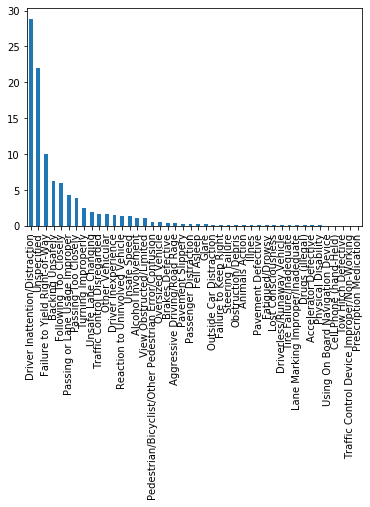

In [176]:
reason_counts1.plot.bar()

### We can plot using matplotlib to explore the data, looking for information and patterns.



### within this plot we see driver inexperience had episdoes of 1,2, and 3 numbers of pedestrians injured.

### Look at data for contributing factor vehicle1  and number of pedestrians injured in boxplot


KeyError: ignored

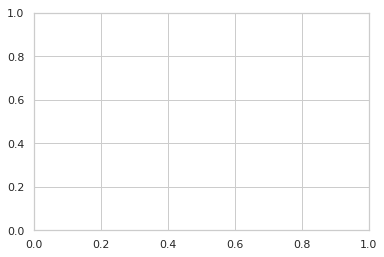

In [0]:



mv_data.boxplot(mv_data['vehicle_type_code1'].value_counts(), by='number_of_motorist_killed')

### Look at this same information with seaborn data visualization tool


ValueError: ignored

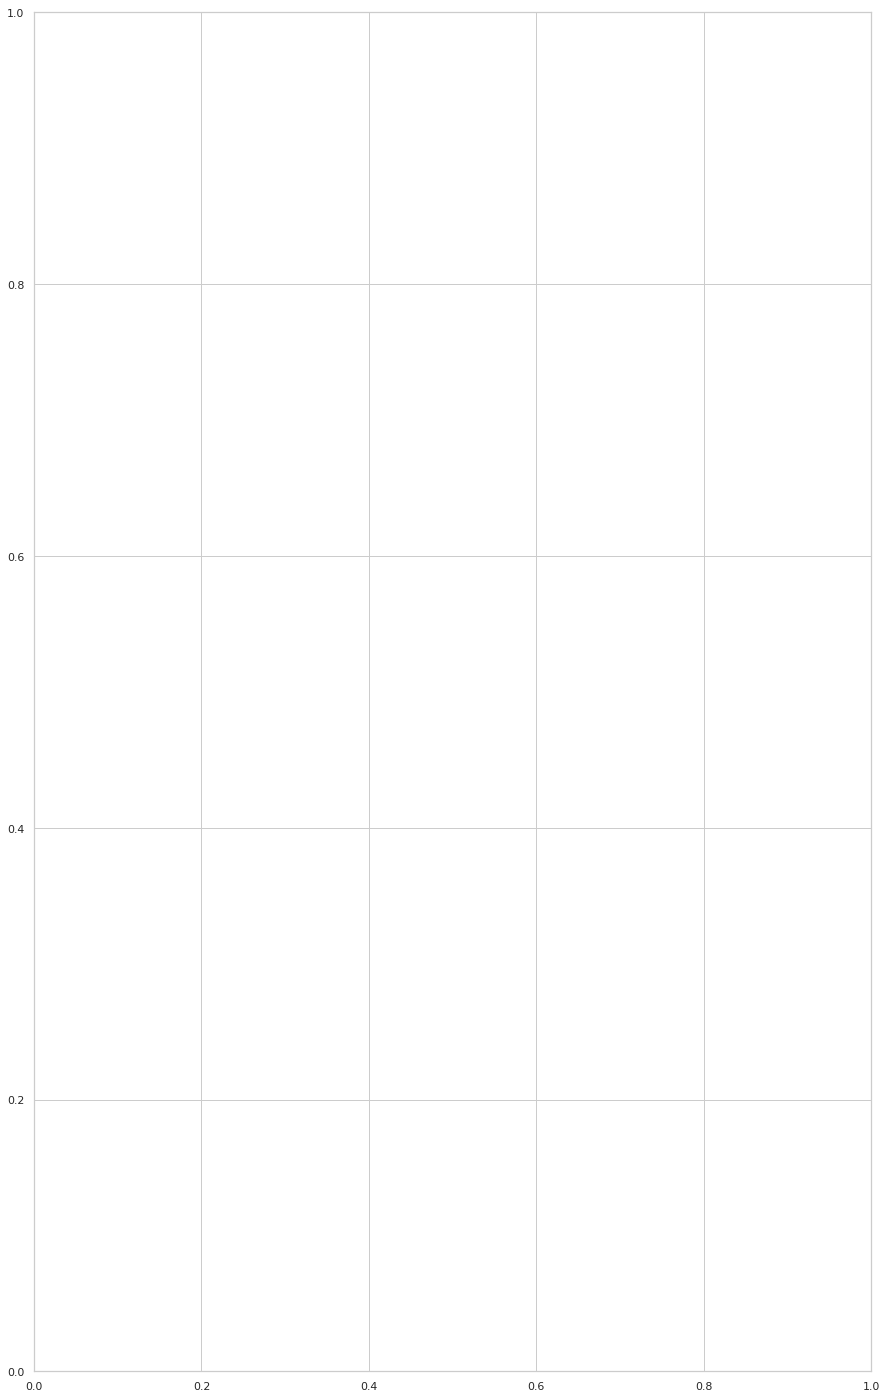

In [0]:
import seaborn as sns
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(15, 25))
sns.scatterplot(x="", y="VEHICLE_TYPE_CODE_1", 
               hue="number_pedestrians_injured", linewidth=0, data=mv_data, ax=ax)

#### So, it looks like for this particular item, crashes with driver inexperience, most vehicles did not have pedestrian injuries. Livery vehicles had 1 pedestrian injury and "motor" (what is motor compared to motor vehicle, I'm not sure) had 1 pedestrian injury. 